In [1]:
import numpy as np
import time
from sklearn.metrics import accuracy_score
import pandas as pd
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
# sonuçlar her seferinde değiştiğinden manuel seed ayarlaması yapıldı
torch.manual_seed(16)
np.random.seed(16)


In [2]:
# data
data = pd.read_csv("dermatology_database_1.csv")
# x ve y
X = data.iloc[:, :34].values
y = data.iloc[:, -1].values
y = y - 1  # Class değerleri 1-6 arası olduğundan onları 0-5 arası yaptım

In [3]:
# train ve test değerleri
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# scaler
scaler = StandardScaler()
# x değerlerini scale etme
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [4]:
# Verileri PyTorch tensörlerine çevirme
X_train_tensor = torch.FloatTensor(X_train)
y_train_tensor = torch.LongTensor(y_train)
X_test_tensor = torch.FloatTensor(X_test)
y_test_tensor = torch.LongTensor(y_test)

In [5]:
# DataLoader oluştur
train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
train_loader = DataLoader(train_dataset, batch_size=16, shuffle=True)

In [6]:
# 1. yapay sinir ağı 
class SimpleNeuralNetwork(nn.Module):
    def __init__(self, input_size, hidden_size, output_size):
        super(SimpleNeuralNetwork, self).__init__()
        self.fc1 = nn.Linear(input_size, hidden_size)  # İlk gizli katman
        self.relu = nn.ReLU() # Aktivasyon fonksiyonu
        self.fc2 = nn.Linear(hidden_size, output_size)  # Çıktı katmanı

    def forward(self, x):
        x = self.fc1(x)
        x = self.relu(x)
        x = self.fc2(x)
        return x

In [7]:
# 2. yapay sinir ağı
class MediumNeuralNetwork(nn.Module):
    def __init__(self, input_size, hidden_size1, hidden_size2, output_size):
        super(MediumNeuralNetwork, self).__init__()
        self.fc1 = nn.Linear(input_size, hidden_size1)
        self.relu1 = nn.ReLU()
        self.fc2 = nn.Linear(hidden_size1, hidden_size2)
        self.relu2 = nn.ReLU()
        self.fc3 = nn.Linear(hidden_size2, output_size)

    def forward(self, x):
        x = self.fc1(x)
        x = self.relu1(x)
        x = self.fc2(x)
        x = self.relu2(x)
        x = self.fc3(x)
        return x

In [8]:
# 3. yapay sinir ağı
class ComplexNeuralNetwork(nn.Module):
    def __init__(self, input_size, hidden_size1, hidden_size2, hidden_size3, output_size):
        super(ComplexNeuralNetwork, self).__init__()
        self.fc1 = nn.Linear(input_size, hidden_size1)
        self.relu1 = nn.ReLU()
        self.fc2 = nn.Linear(hidden_size1, hidden_size2)
        self.relu2 = nn.ReLU()
        self.fc3 = nn.Linear(hidden_size2, hidden_size3)
        self.relu3 = nn.ReLU()
        self.fc4 = nn.Linear(hidden_size3, output_size)

    def forward(self, x):
        x = self.fc1(x)
        x = self.relu1(x)
        x = self.fc2(x)
        x = self.relu2(x)
        x = self.fc3(x)
        x = self.relu3(x)
        x = self.fc4(x)
        return x

In [9]:
# epoch değeri
epochs = 100
# criterion
criterion = nn.CrossEntropyLoss()

In [10]:
# sonuçlar ve kayıplar için listler
results = []
losses = []
# eğitim ve değerlendirme
def train_and_evaluate(model, optimizer, name):
    start_time = time.time()

    # Eğitim
    for epoch in range(epochs):
        for features, labels in train_loader:
            outputs = model(features)
            loss = criterion(outputs, labels)

            optimizer.zero_grad()
            loss.backward()
            optimizer.step()
        
        losses.append(loss.item())


    end_time = time.time()
    training_time = end_time - start_time

    # Test doğruluğu
    model.eval()  # Değerlendirme moduna geç
    with torch.no_grad():
        test_outputs = model(X_test_tensor)
        predicted_probs = nn.Softmax(dim=1)(test_outputs)
        predicted_labels = torch.argmax(predicted_probs, dim=1)
        accuracy = accuracy_score(y_test_tensor.numpy(), predicted_labels.numpy())
        print(f'Accuracy on test set: {accuracy * 100:.2f}%')

    # Sonuçları kaydet
    results.append({
        "Model Numarası": name,
        "Test Doğruluğu (%)": accuracy * 100,
        "Eğitim Süresi (saniye)": training_time
    })

Accuracy on test set: 94.44%


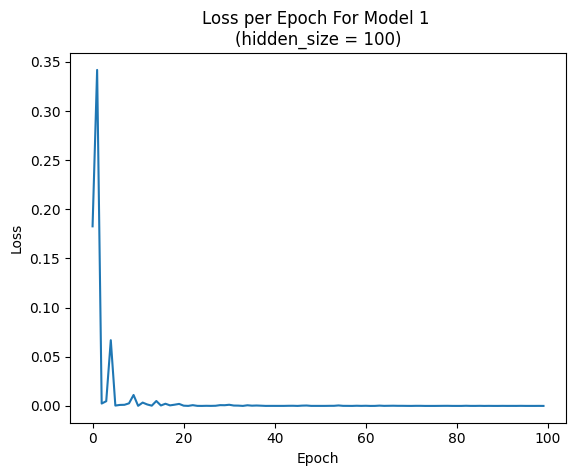

In [11]:
# Model 1
input_size = X_train.shape[1]
hidden_size = 100
output_size = len(set(y)) 

model = SimpleNeuralNetwork(input_size, hidden_size, output_size)
optimizer = optim.Adam(model.parameters(), lr=0.01)

# eğitim, değerlendirme ve plot çizimi
train_and_evaluate(model, optimizer, "Model 1")
plt.plot(range(epochs), losses)
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title(f'Loss per Epoch For Model 1 \n(hidden_size = {hidden_size})')
plt.show()
losses.clear()

Accuracy on test set: 97.22%


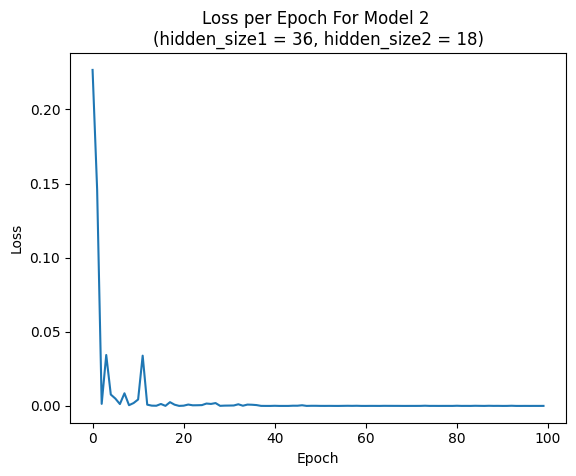

In [12]:
# Model 2
input_size = X_train.shape[1]
hidden_size1 = 36
hidden_size2 = 18
output_size = len(set(y))

model2 = MediumNeuralNetwork(input_size, hidden_size1, hidden_size2, output_size)
optimizer2 = optim.Adam(model2.parameters(), lr=0.01)

# eğitim, değerlendirme ve plot çizimi
train_and_evaluate(model2, optimizer2, "Model 2")
plt.plot(range(epochs), losses)
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title(f'Loss per Epoch For Model 2 \n(hidden_size1 = {hidden_size1}, hidden_size2 = {hidden_size2})')
plt.show()
losses.clear()

Accuracy on test set: 98.61%


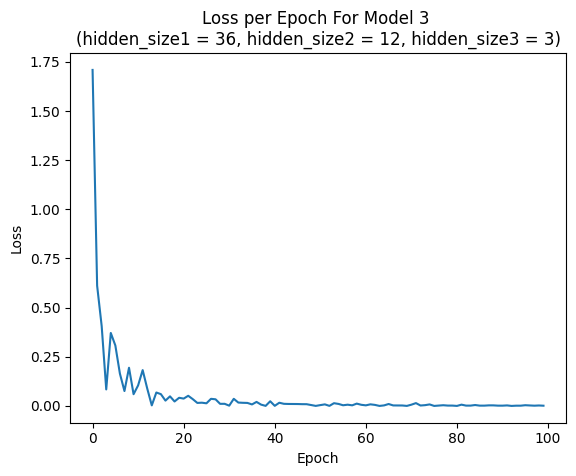

In [13]:
# Model 3
input_size = X_train.shape[1]
hidden_size1 = 36
hidden_size2 = 12
hidden_size3 = 3
output_size = len(set(y))

model3 = ComplexNeuralNetwork(input_size, hidden_size1, hidden_size2, hidden_size3, output_size)
optimizer3 = optim.Adam(model3.parameters(), lr=0.01)

# eğitim, değerlendirme ve plot çizimi
train_and_evaluate(model3, optimizer3, "Model 3")
plt.plot(range(epochs), losses)
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title(f'Loss per Epoch For Model 3 \n(hidden_size1 = {hidden_size1}, hidden_size2 = {hidden_size2}, hidden_size3 = {hidden_size3})')
plt.show()
plt.show()
losses.clear()

In [14]:
# 4. adımdaki yapay sinir ağlarının karşılaştırılması
results_df = pd.DataFrame(results)
print(results_df)

  Model Numarası  Test Doğruluğu (%)  Eğitim Süresi (saniye)
0        Model 1           94.444444                0.546137
1        Model 2           97.222222                0.579799
2        Model 3           98.611111                0.679708


In [15]:
# en iyi accuracy değerini 3. model verdi
# 3. modelin aktivasyon fonksiyonunu Sigmoid yaptım
class ComplexNeuralNetwork(nn.Module):
    def __init__(self, input_size, hidden_size1, hidden_size2, hidden_size3, output_size):
        super(ComplexNeuralNetwork, self).__init__()
        self.fc1 = nn.Linear(input_size, hidden_size1)
        self.sigmoid1 = nn.Sigmoid()
        self.fc2 = nn.Linear(hidden_size1, hidden_size2)
        self.sigmoid2 = nn.Sigmoid()
        self.fc3 = nn.Linear(hidden_size2, hidden_size3)
        self.sigmoid3 = nn.Sigmoid()
        self.fc4 = nn.Linear(hidden_size3, output_size)

    def forward(self, x):
        x = self.fc1(x)
        x = self.sigmoid1(x)
        x = self.fc2(x)
        x = self.sigmoid2(x)
        x = self.fc3(x)
        x = self.sigmoid3(x)
        x = self.fc4(x)
        return x

Accuracy on test set: 97.22%


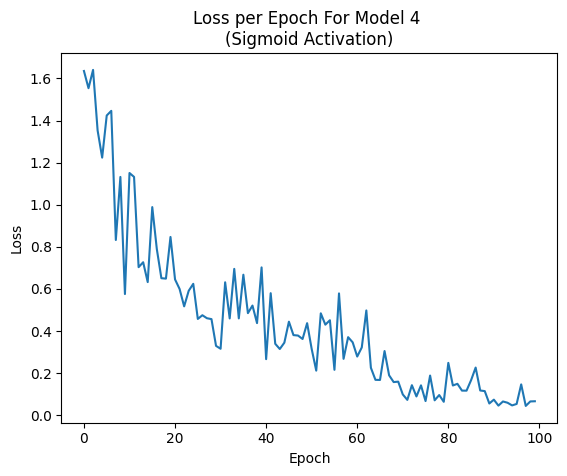

In [16]:
model4 = ComplexNeuralNetwork(input_size, hidden_size1, hidden_size2, hidden_size3, output_size)
optimizer4 = optim.Adam(model4.parameters(), lr=0.01)

train_and_evaluate(model4, optimizer4, "Model 4")
plt.plot(range(epochs), losses)
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Loss per Epoch For Model 4 \n(Sigmoid Activation)')
plt.show()
losses.clear()

In [17]:
# Aktivasyon fonksiyonu GELU
class ComplexNeuralNetwork(nn.Module):
    def __init__(self, input_size, hidden_size1, hidden_size2, hidden_size3, output_size):
        super(ComplexNeuralNetwork, self).__init__()
        self.fc1 = nn.Linear(input_size, hidden_size1)
        self.gelu1 = nn.GELU()
        self.fc2 = nn.Linear(hidden_size1, hidden_size2)
        self.gelu2 = nn.GELU()
        self.fc3 = nn.Linear(hidden_size2, hidden_size3)
        self.gelu3 = nn.GELU()
        self.fc4 = nn.Linear(hidden_size3, output_size)

    def forward(self, x):
        x = self.fc1(x)
        x = self.gelu1(x)
        x = self.fc2(x)
        x = self.gelu2(x)
        x = self.fc3(x)
        x = self.gelu3(x)
        x = self.fc4(x)
        return x

Accuracy on test set: 95.83%


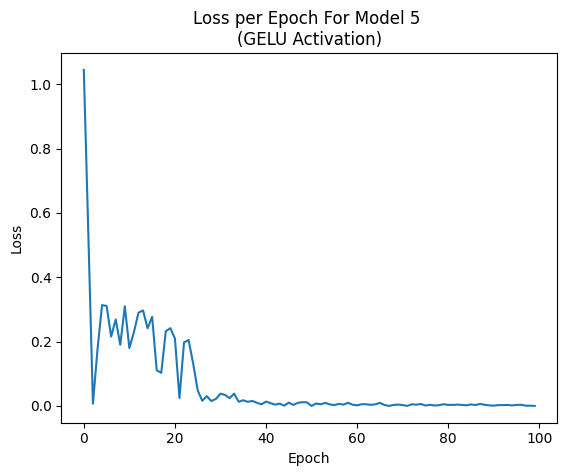

In [18]:
model5 = ComplexNeuralNetwork(input_size, hidden_size1, hidden_size2, hidden_size3, output_size)
optimizer5 = optim.Adam(model5.parameters(), lr=0.01)

train_and_evaluate(model5, optimizer5, "Model 5")
plt.plot(range(epochs), losses)
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Loss per Epoch For Model 5 \n(GELU Activation)')
plt.show()
losses.clear()